In [160]:
import uproot
import pandas as pd
import cufflinks as cf
import sys,os, time, glob
import re
import numpy as np
import matplotlib.pyplot as plt
import muonfixedid, chamberlist_run3
import splitter_regions_Run2
import mdtCalib_functions
from IPython.display import display

In [161]:
# check the TGC and MDT global hit map

# load file
inputCalibNtuple='/Users/zyan/cernbox/SWAN_projects/mdtCalibrationAnalysis/mdtAnalysisRun3/cbnt_run476785V3/data24_calib.00476785.calibration_MuonAll.daq.RAW.0001_0004-0113.ntuple.root'
#inputCalibNtuple='/Users/zyan/cernbox/SWAN_projects/mdtCalibrationAnalysis/mdtAnalysisRun3/runTGCnewRdo/data24_calib.00476785.calibration_MuonAll.daq.RAW.0001_0004-0200.ntuple.root'
#inputCalibNtuple='/Users/zyan/cernbox/SWAN_projects/mdtCalibrationAnalysis/mdtAnalysisRun3/runTGCnewRdo/data23_calib.00456729.calibration_MuonAll.daq.RAW.0000_0004-0200.ntuple.root'
f = uproot.open(inputCalibNtuple)
treeName = "Segments"
tree = f[treeName]
region = int(inputCalibNtuple.split("-", 1)[1][:4])
run = inputCalibNtuple.split('00',1)[1][:6]
lb = inputCalibNtuple.split("-", 1)[0][-9:]
# convert mdtCalname to mdtHardname by chamberlist.py
chamberInRegion = [chamberlist_run3.MDThardname(chamberlist_run3.MDTindex(x)) for x in splitter_regions_Run2.regionlist[region]]
print('process run %s lumiblock %s region %s, chamberList %s' % (run, lb, region, chamberInRegion))
#df_all = tree.arrays()

process run 476785 lumiblock 0001_0004 region 113, chamberList ['IsWRONG', 'BIS7A02', 'EES1A02', 'EES2A02', 'EMS4A02', 'EMS5A02']


In [162]:
# Create the column groups
branchList = tree.keys()
print(branchList)
branchPrefix = ['trk','trkHit','event','rawMdt','rawTgc','trkHole','trkTriggerHit']
branchMapping = {key : [] for key in branchPrefix}
for branch in branchList:
    #branch= branchB.decode('ASCII')
    branchName,variableName = branch.split('_',1)
    print(branchName,variableName)
    if branchName in branchPrefix :
        branchMapping[branchName].append(branch)
#branchMapping['trkHole']

['event_LVL2Pt', 'event_bcId', 'event_eventNumber', 'event_lumiBlock', 'event_runNumber', 'event_timeStamp', 'rawMdt_adc', 'rawMdt_gPosX', 'rawMdt_gPosY', 'rawMdt_gPosZ', 'rawMdt_id', 'rawMdt_nRMdt', 'rawMdt_tdc', 'rawRpc_gPosX', 'rawRpc_gPosY', 'rawRpc_gPosZ', 'rawRpc_id', 'rawRpc_nRRpc', 'rawRpc_time', 'rawTgc_bcBitMap', 'rawTgc_gPosX', 'rawTgc_gPosY', 'rawTgc_gPosZ', 'rawTgc_id', 'rawTgc_nRTgc', 'trkHit_adc', 'trkHit_bkgTime', 'trkHit_calibStatus', 'trkHit_centerX', 'trkHit_centerY', 'trkHit_centerZ', 'trkHit_closestApproachX', 'trkHit_closestApproachY', 'trkHit_closestApproachZ', 'trkHit_distRO', 'trkHit_driftRadius', 'trkHit_driftTime', 'trkHit_error', 'trkHit_gClosestApproachX', 'trkHit_gClosestApproachY', 'trkHit_gClosestApproachZ', 'trkHit_gPosX', 'trkHit_gPosY', 'trkHit_gPosZ', 'trkHit_id', 'trkHit_localAngle', 'trkHit_lorTime', 'trkHit_nMdtHits', 'trkHit_posX', 'trkHit_posY', 'trkHit_posZ', 'trkHit_propTime', 'trkHit_pull', 'trkHit_rTrk', 'trkHit_resi', 'trkHit_sagTime', 'trk

In [163]:
# create two pandas dataframe for trkHit and trkOutliers
df_trk = tree.arrays(branchMapping['trkHit'],library = 'pd')
df_trk_hits = df_trk[0][df_trk[0].trkHit_type==1]
df_trk_outliers = df_trk[0][df_trk[0].trkHit_type==4]
print(f'{inputCalibNtuple} contains {df_trk_hits.shape[0]} track hits, {df_trk_outliers.shape[0]} track outliers')
# create the pandas dataframe for trkHole
df_hole = tree.arrays(branchMapping['trkHole'],library = 'pd')
df_hole_MDT = df_hole[0][df_hole[0].trkHole_type==1]
# create the pandas dataframe for rawMdtHits
df_raw_MDT = tree.arrays(branchMapping['rawMdt'],library = 'pd')
df_raw_TGC = tree.arrays(branchMapping['rawTgc'],library = 'pd')
df_trk_TGC = tree.arrays(branchMapping['trkTriggerHit'],library = 'pd')
print(f' contains {df_hole_MDT.shape[0]} track holes, {df_raw_MDT.shape[0]} raw MDT hits, {df_raw_TGC.shape[0]} raw TGC hits')

/Users/zyan/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:747: FutureWarning:

MultiIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.



/Users/zyan/cernbox/SWAN_projects/mdtCalibrationAnalysis/mdtAnalysisRun3/cbnt_run476785V3/data24_calib.00476785.calibration_MuonAll.daq.RAW.0001_0004-0113.ntuple.root contains 118014 track hits, 7711 track outliers


/Users/zyan/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:747: FutureWarning:

MultiIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.

/Users/zyan/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:747: FutureWarning:

MultiIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.

/Users/zyan/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:747: FutureWarning:

MultiIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.

/Users/zyan/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:747: FutureWarning:

MultiIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.



 contains 4871 track holes, 881189 raw MDT hits, 296891 raw TGC hits


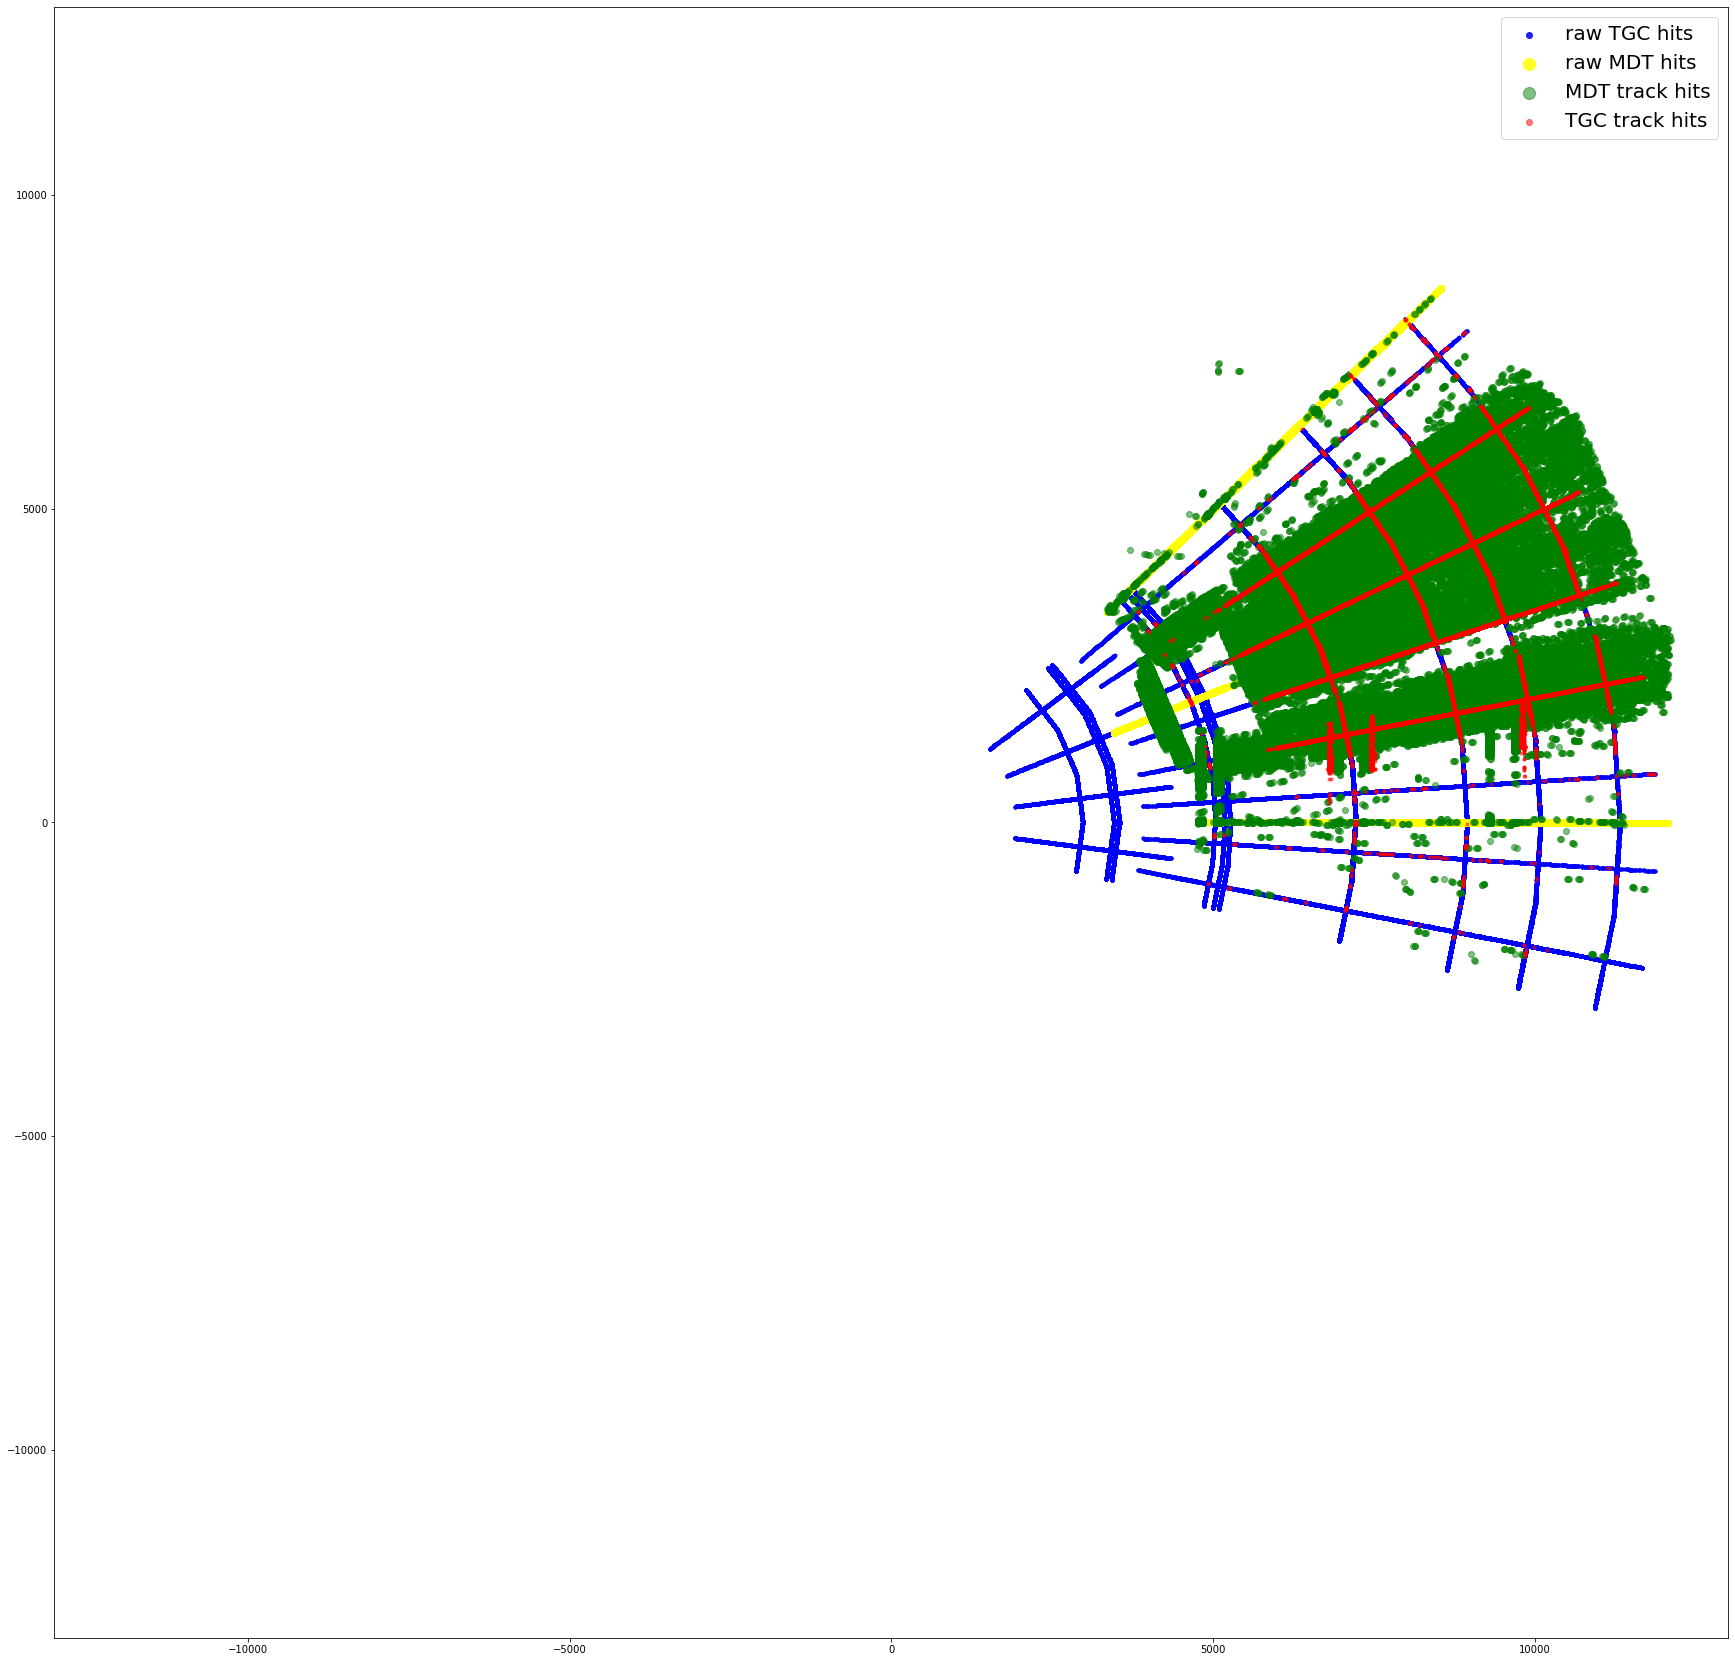

In [172]:

y1 = list(df_trk_hits.trkHit_gPosY)
x1 = list(df_trk_hits.trkHit_gPosX)
y4 = list(df_trk_TGC[0].trkTriggerHit_gPosY)
x4 = list(df_trk_TGC[0].trkTriggerHit_gPosX)
y2 = list(df_raw_TGC.rawTgc_gPosY)
x2 = list(df_raw_TGC.rawTgc_gPosX)
y3 = list(df_raw_MDT.rawMdt_gPosY)
x3 = list(df_raw_MDT.rawMdt_gPosX)

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot()

d = ax.scatter(x2,y2, c='blue', label = "raw TGC hits", marker ='.',  cmap='hsv', alpha=0.85)
e = ax.scatter(x3,y3, c='yellow', label = "raw MDT hits",marker ='o', cmap='hsv', alpha=0.85)
c = ax.scatter(x1,y1, c='green', label = "MDT track hits",marker ='o', cmap='hsv', alpha=0.5)
f = ax.scatter(x4,y4, c='red', label = "TGC track hits", marker ='.', cmap='hsv', alpha=0.5)
ax.set_xlim(-13000, 13000)
ax.set_ylim(-13000, 13000)
#ax.set_aspect('equal', adjustable='box')
ax.legend(fontsize="20", loc ="upper right", markerscale=2)
fig.savefig(f'run{run}_region{region}_MDTvsTGC_HitMap.png')

#ax1 = df_trk_hits.plot.scatter(list(df_trk_hits.trkHit_gPosY),list(df_trk_hits.trkHit_gPosX))

In [94]:
df_trk_hits.trkHit_gPosY

entry  subentry
0      0           -4340.484863
       1           -4351.129883
       2           -4375.613281
       3           -4399.419922
       4           -4418.859375
                       ...     
11686  14         -10059.214844
       16         -10121.892578
       17         -10456.784180
       18         -10481.967773
       19         -10495.646484
Name: trkHit_gPosY, Length: 135259, dtype: float32

In [143]:
# check the track_hole and try efficiency calculation
df_hole_MDT

trkHole_driftRadius  trkHole_gPosX  trkHole_gPosY  \
entry subentry                                                      
19    0                    2.593412   -3840.672607    2018.708984   
23    0                   14.595089   -4322.206543    1683.051025   
28    0                   14.764302   -4097.645996    1783.102539   
53    0                   13.233335   -3284.712158    1700.352051   
      1                    5.884329   -3291.398682    1705.105225   
...                             ...            ...            ...   
958   0                   14.570046   -4264.204102    1862.628540   
977   0                    4.739532   -3499.510010    1486.187988   
978   2                    6.444453   -3839.307617     923.489624   
      3                    3.893154   -3844.166992     924.328369   
981   0                    4.505436   -2922.944092     417.097076   

                trkHole_gPosZ  trkHole_id  trkHole_trackIndex  trkHole_type  
entry subentry                                                               
19    0         -14005.257812   321945235                   0             1  
23    0         -13999.119141   321945245                   0             1  
28    0         -10786.417969   103841170                   0             1  
53    0         -13725.290039   322468927                   0             1  
      1         -13753.300781   322469055                   0             1  
...                       ...         ...                 ...           ...  
958   0         -21972.222656   372276869                   0             1  
977   0         -13978.088867   321945090                   0             1  
978   2         -21690.492188   372800549                   0             1  
      3         -21718.281250   372800677                   0             1  
981   0         -14451.740234   305700646                   0             1  

[152 rows x 7 columns]

In [8]:
# load file
inputCalibNtuple='/Users/zyan/cernbox/SWAN_projects/mdtCalibrationAnalysis/mdtAnalysisRun3/cbnt_run476785_24latest/data24_calib.00476785.calibration_MuonAll.daq.RAW.0001_0004-0051.ntuple.root'
f = uproot.open(inputCalibNtuple)
treeName = "Segments"
tree = f[treeName]
region = int(inputCalibNtuple.split("-", 1)[1][:4])
run = inputCalibNtuple.split('00',1)[1][:6]
lb = inputCalibNtuple.split("-", 1)[0][-9:]
# convert mdtCalname to mdtHardname by chamberlist.py
chamberInRegion = [chamberlist_run3.MDThardname(chamberlist_run3.MDTindex(x)) for x in splitter_regions_Run2.regionlist[region]]
print('process run %s lumiblock %s region %s, chamberList %s' % (run, lb, region, chamberInRegion))
#df_all = tree.arrays()

process run 476785 lumiblock 0001_0004 region 51, chamberList ['BME4A13', 'BMG2A12', 'BMG4A12', 'BMG6A12']


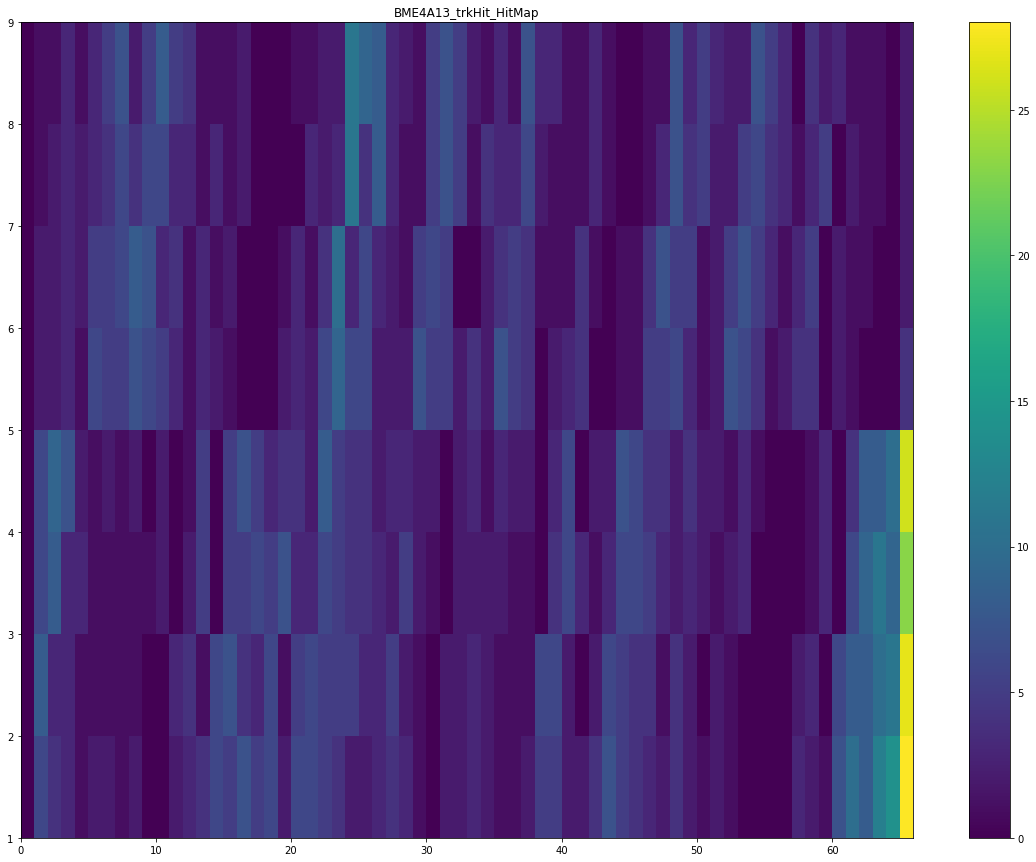

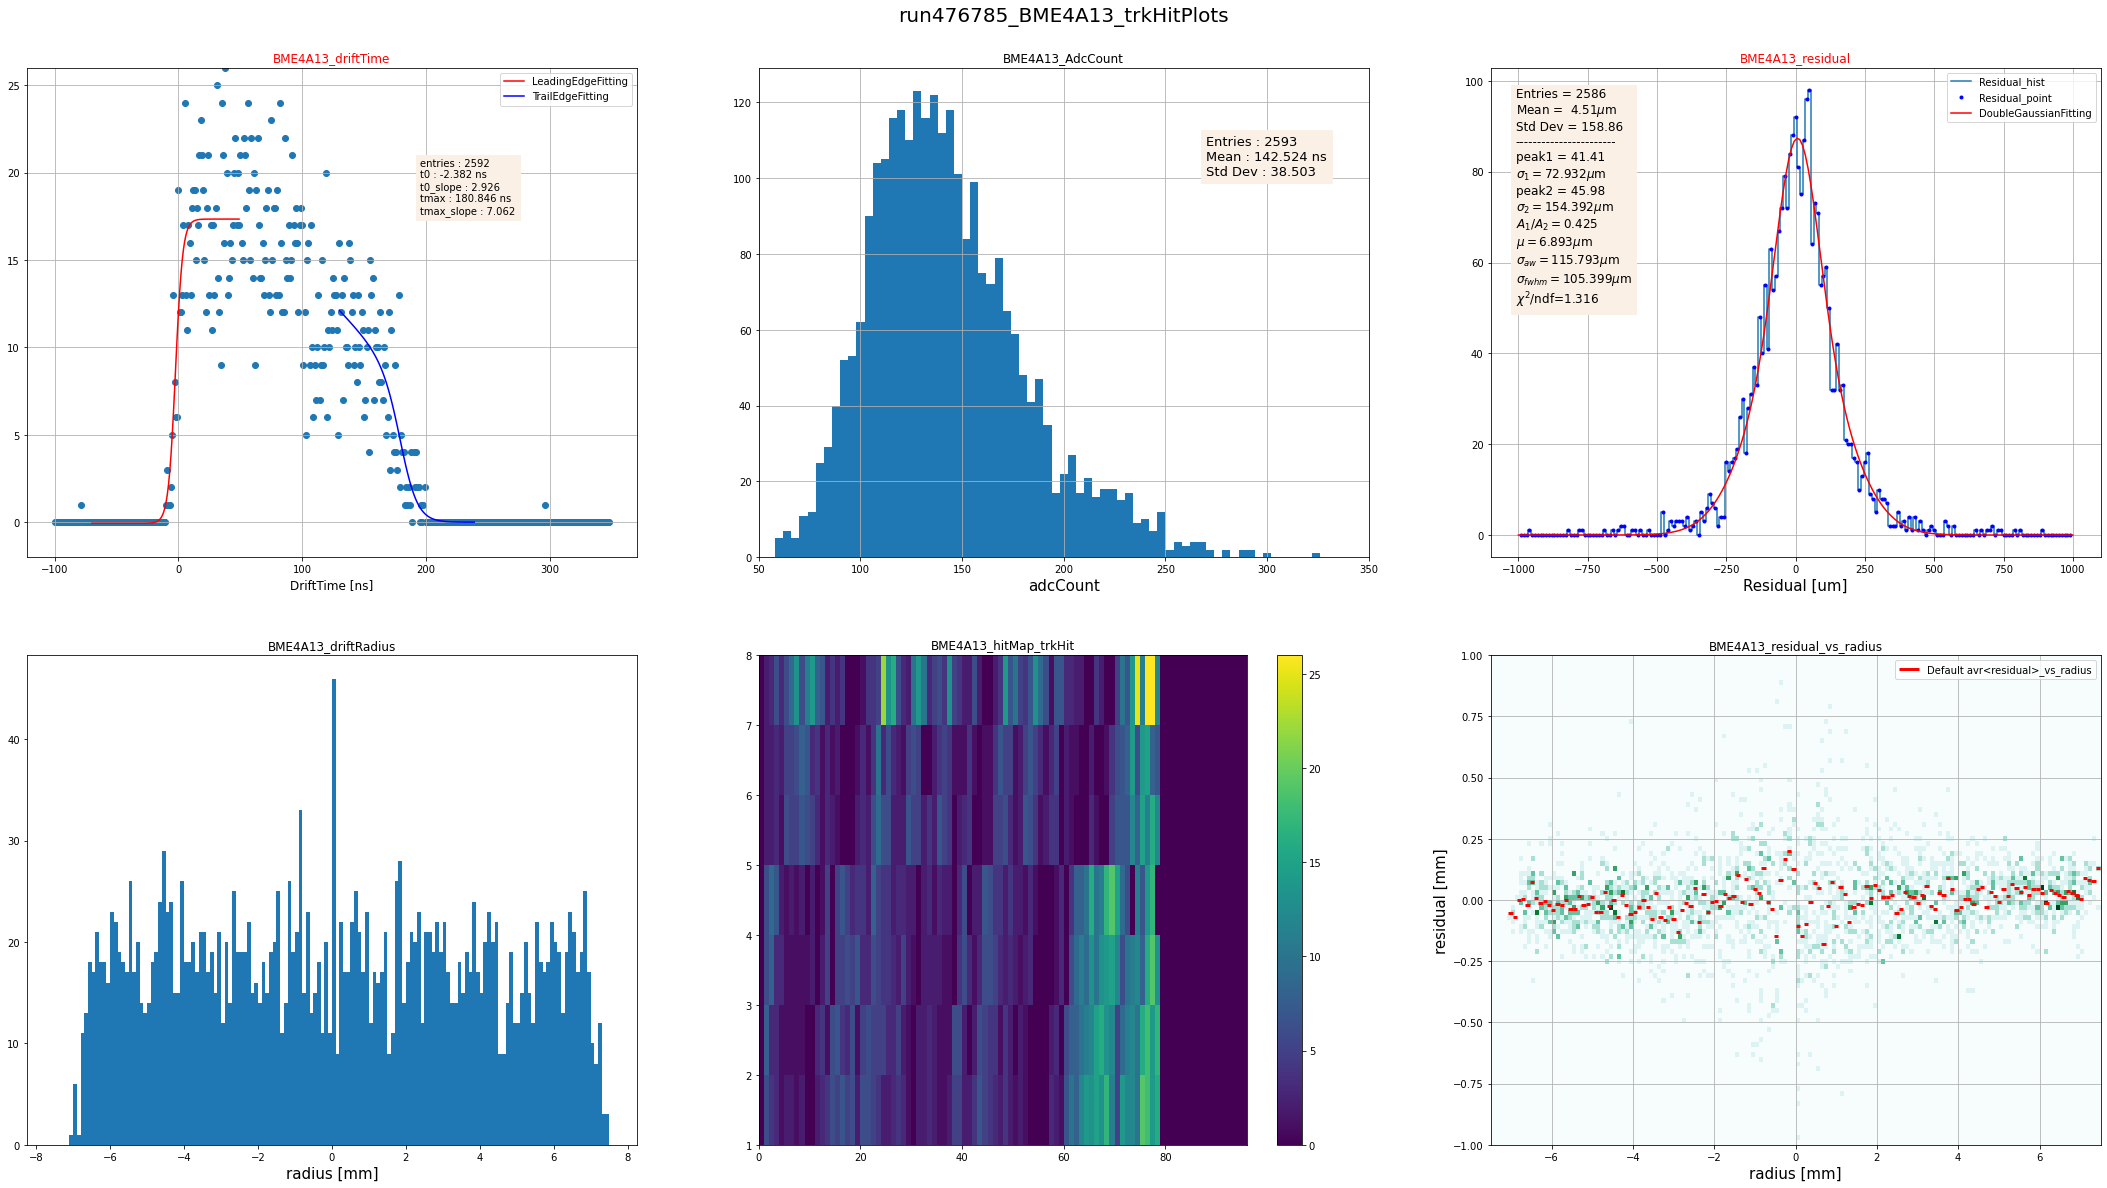

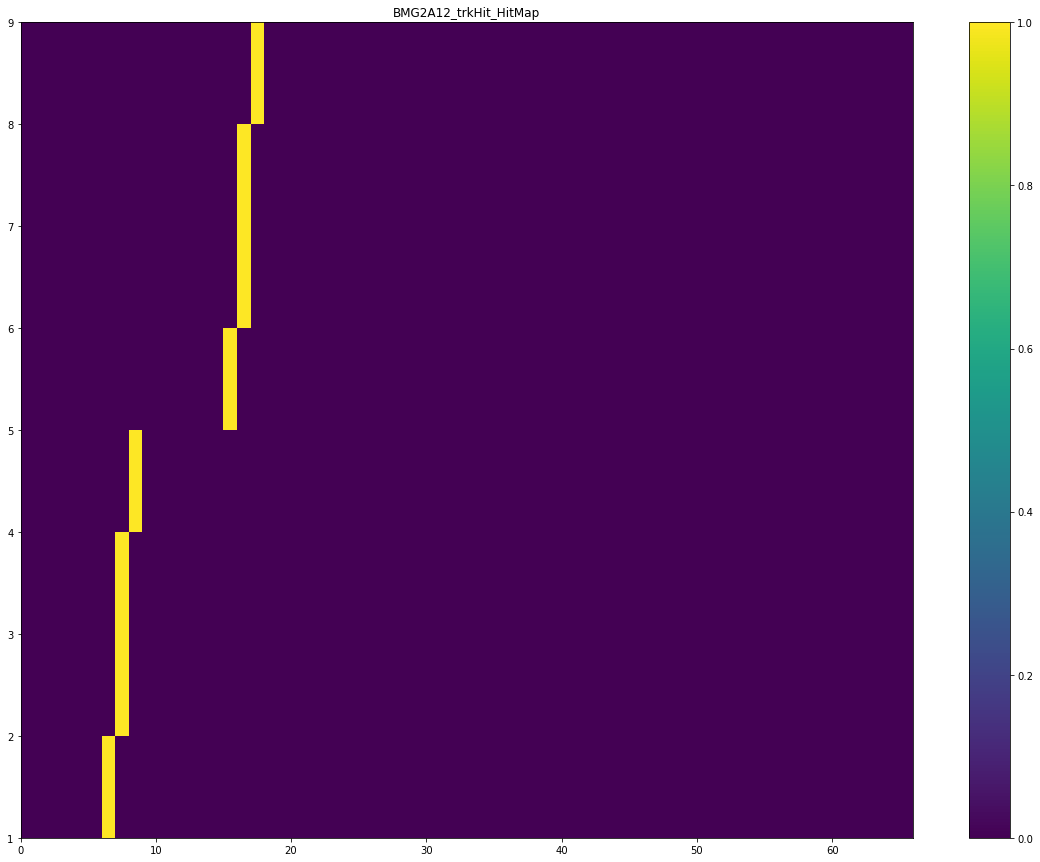

/Users/zyan/cernbox/SWAN_projects/mdtCalibrationAnalysis/mdtAnalysisRun3/mdtCalib_functions.py:479: RuntimeWarning:

overflow encountered in exp



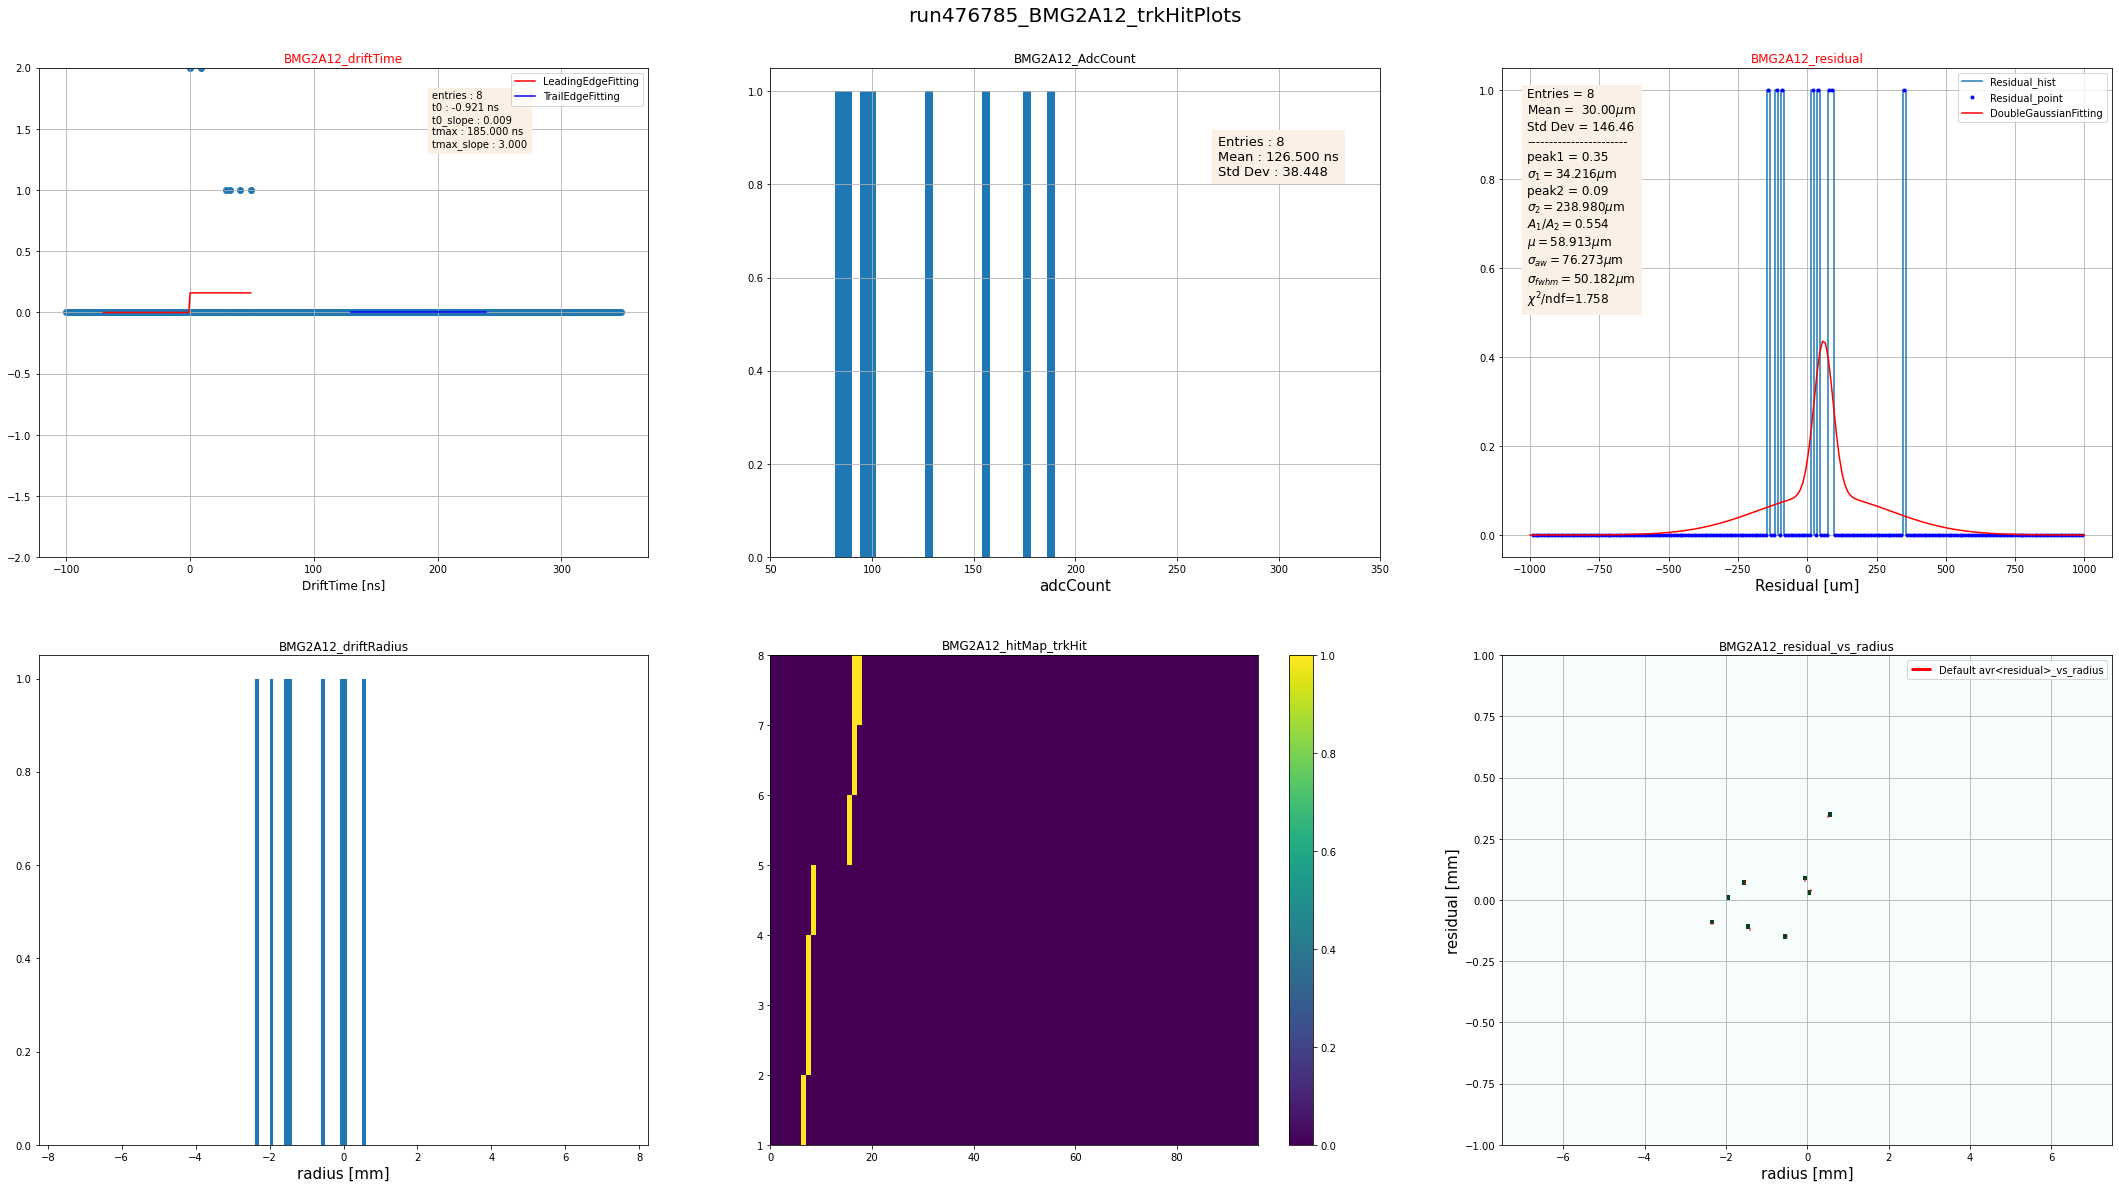

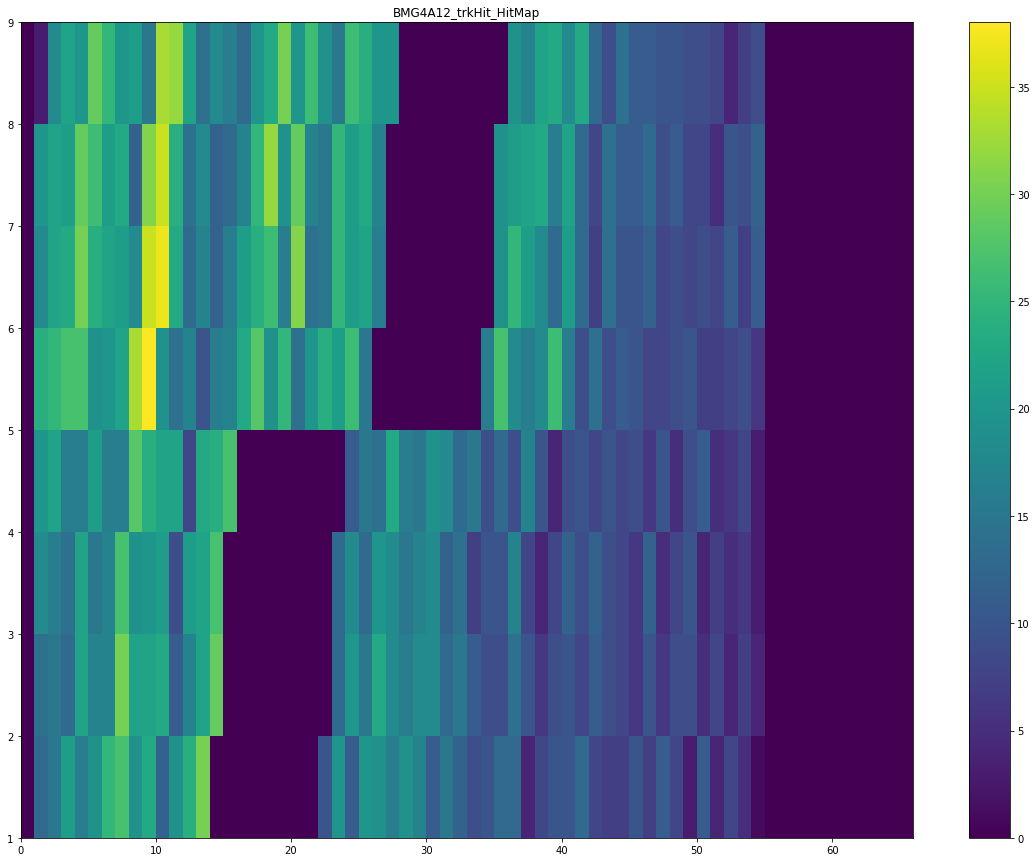

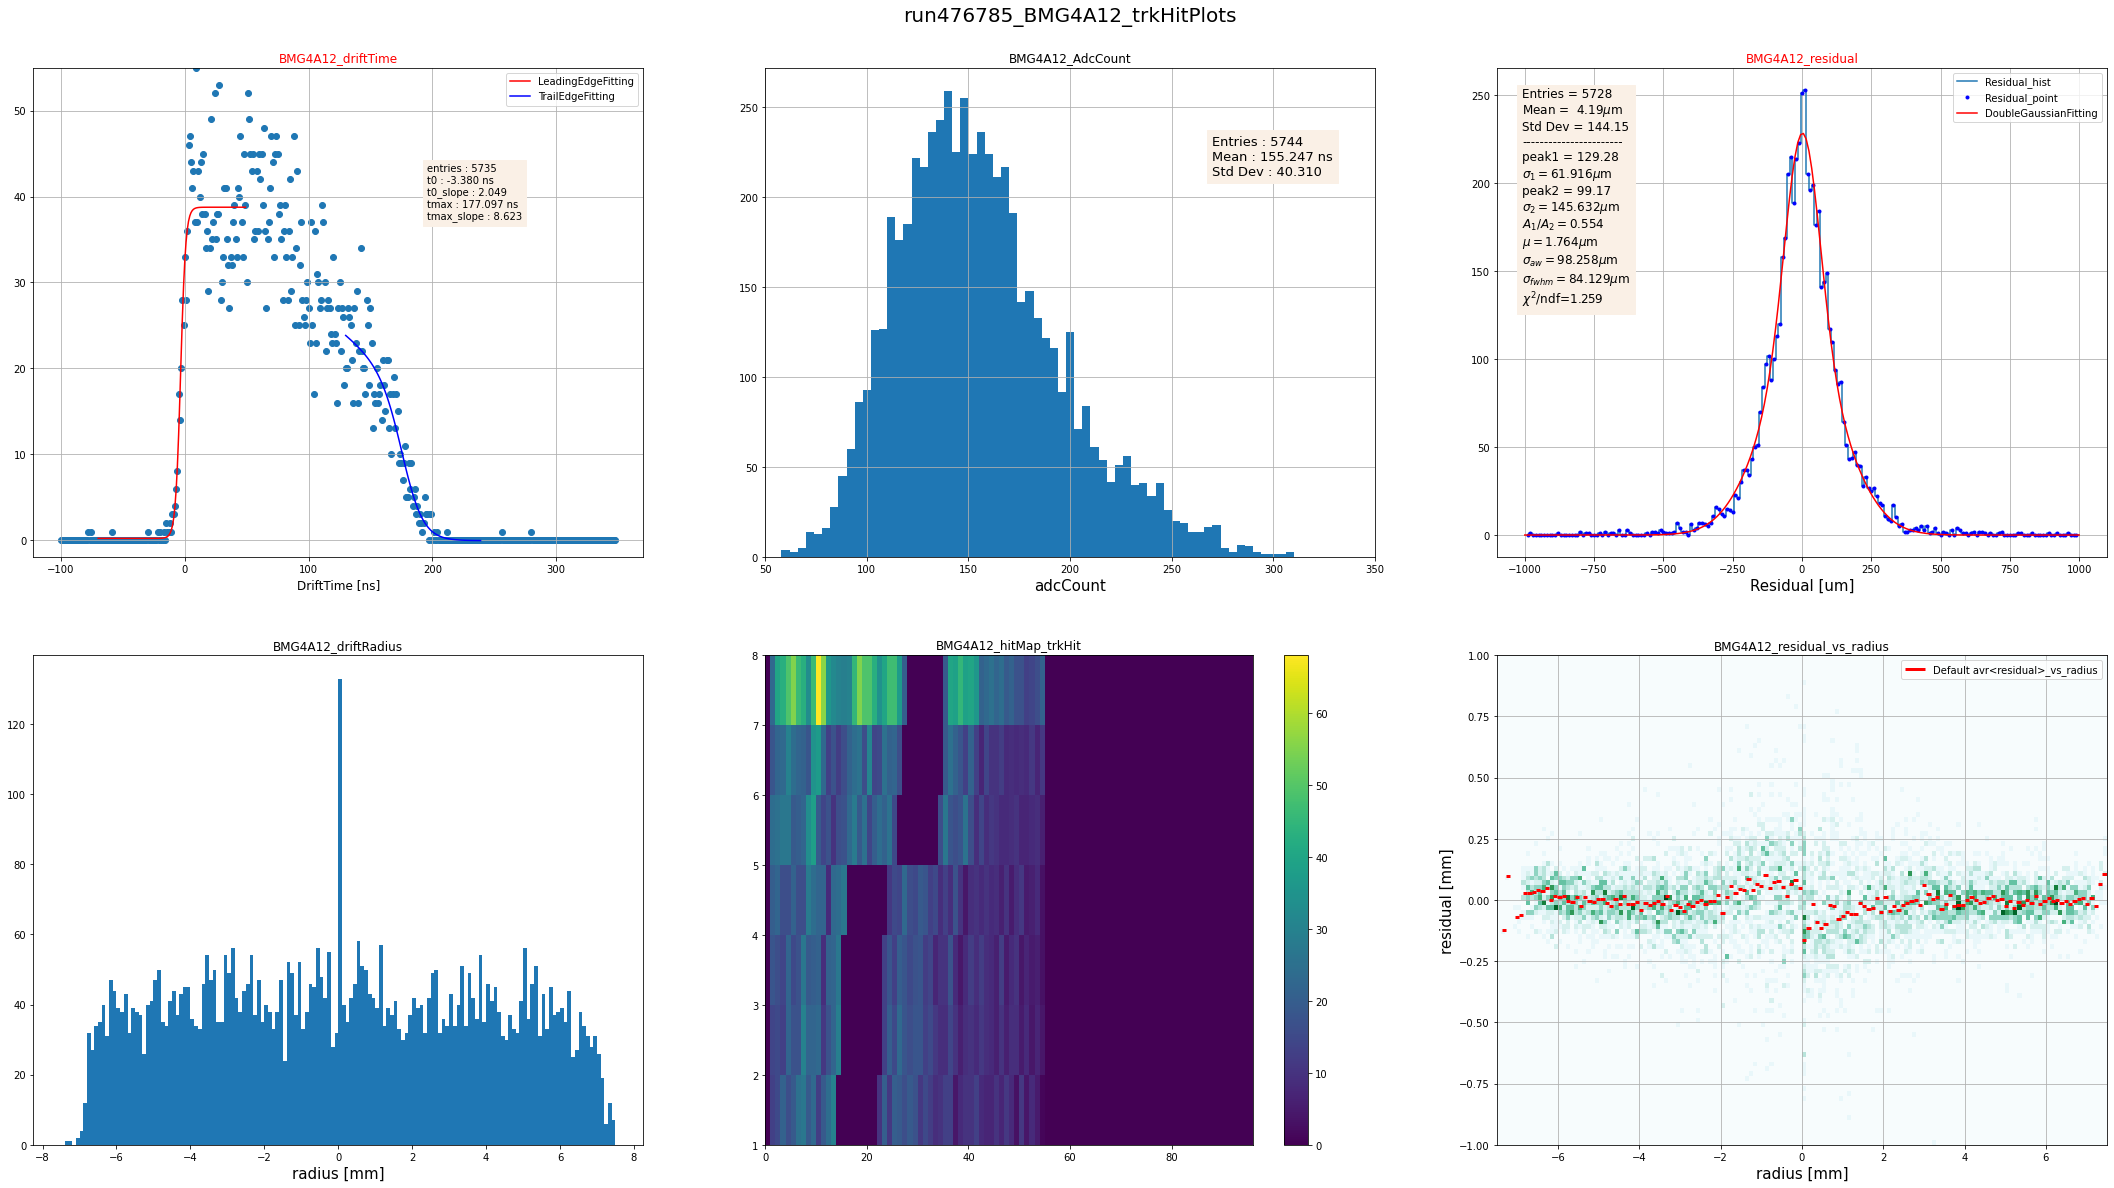

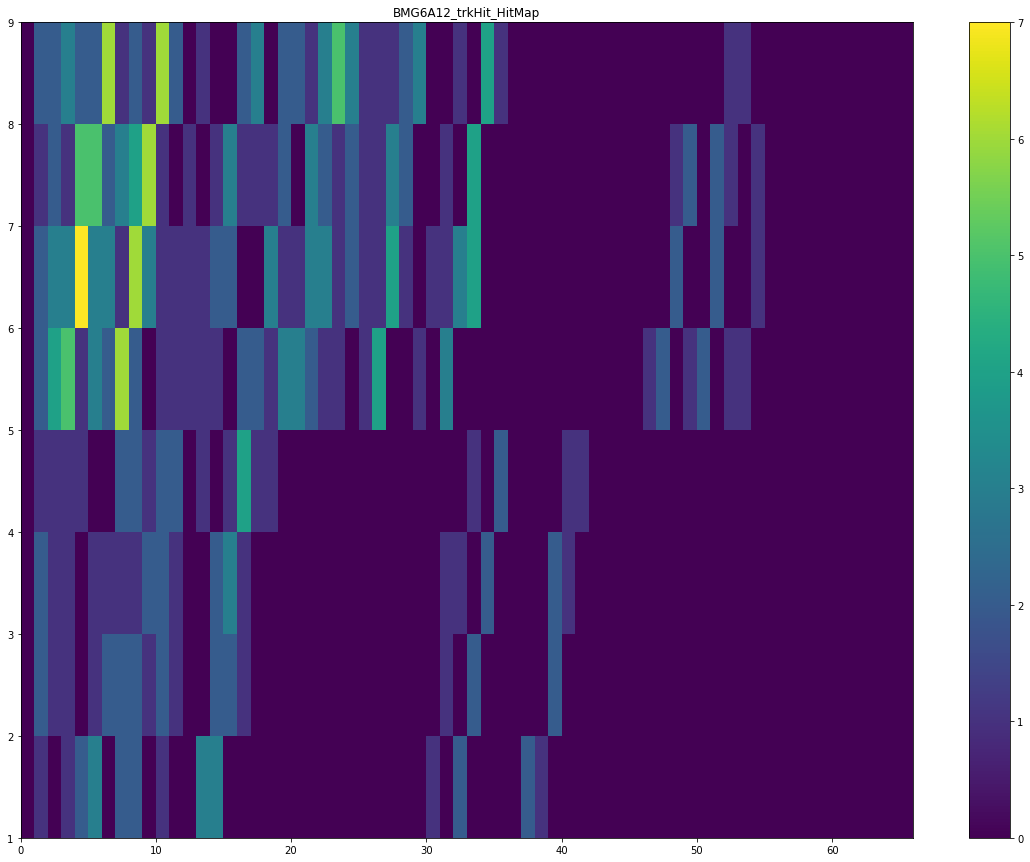

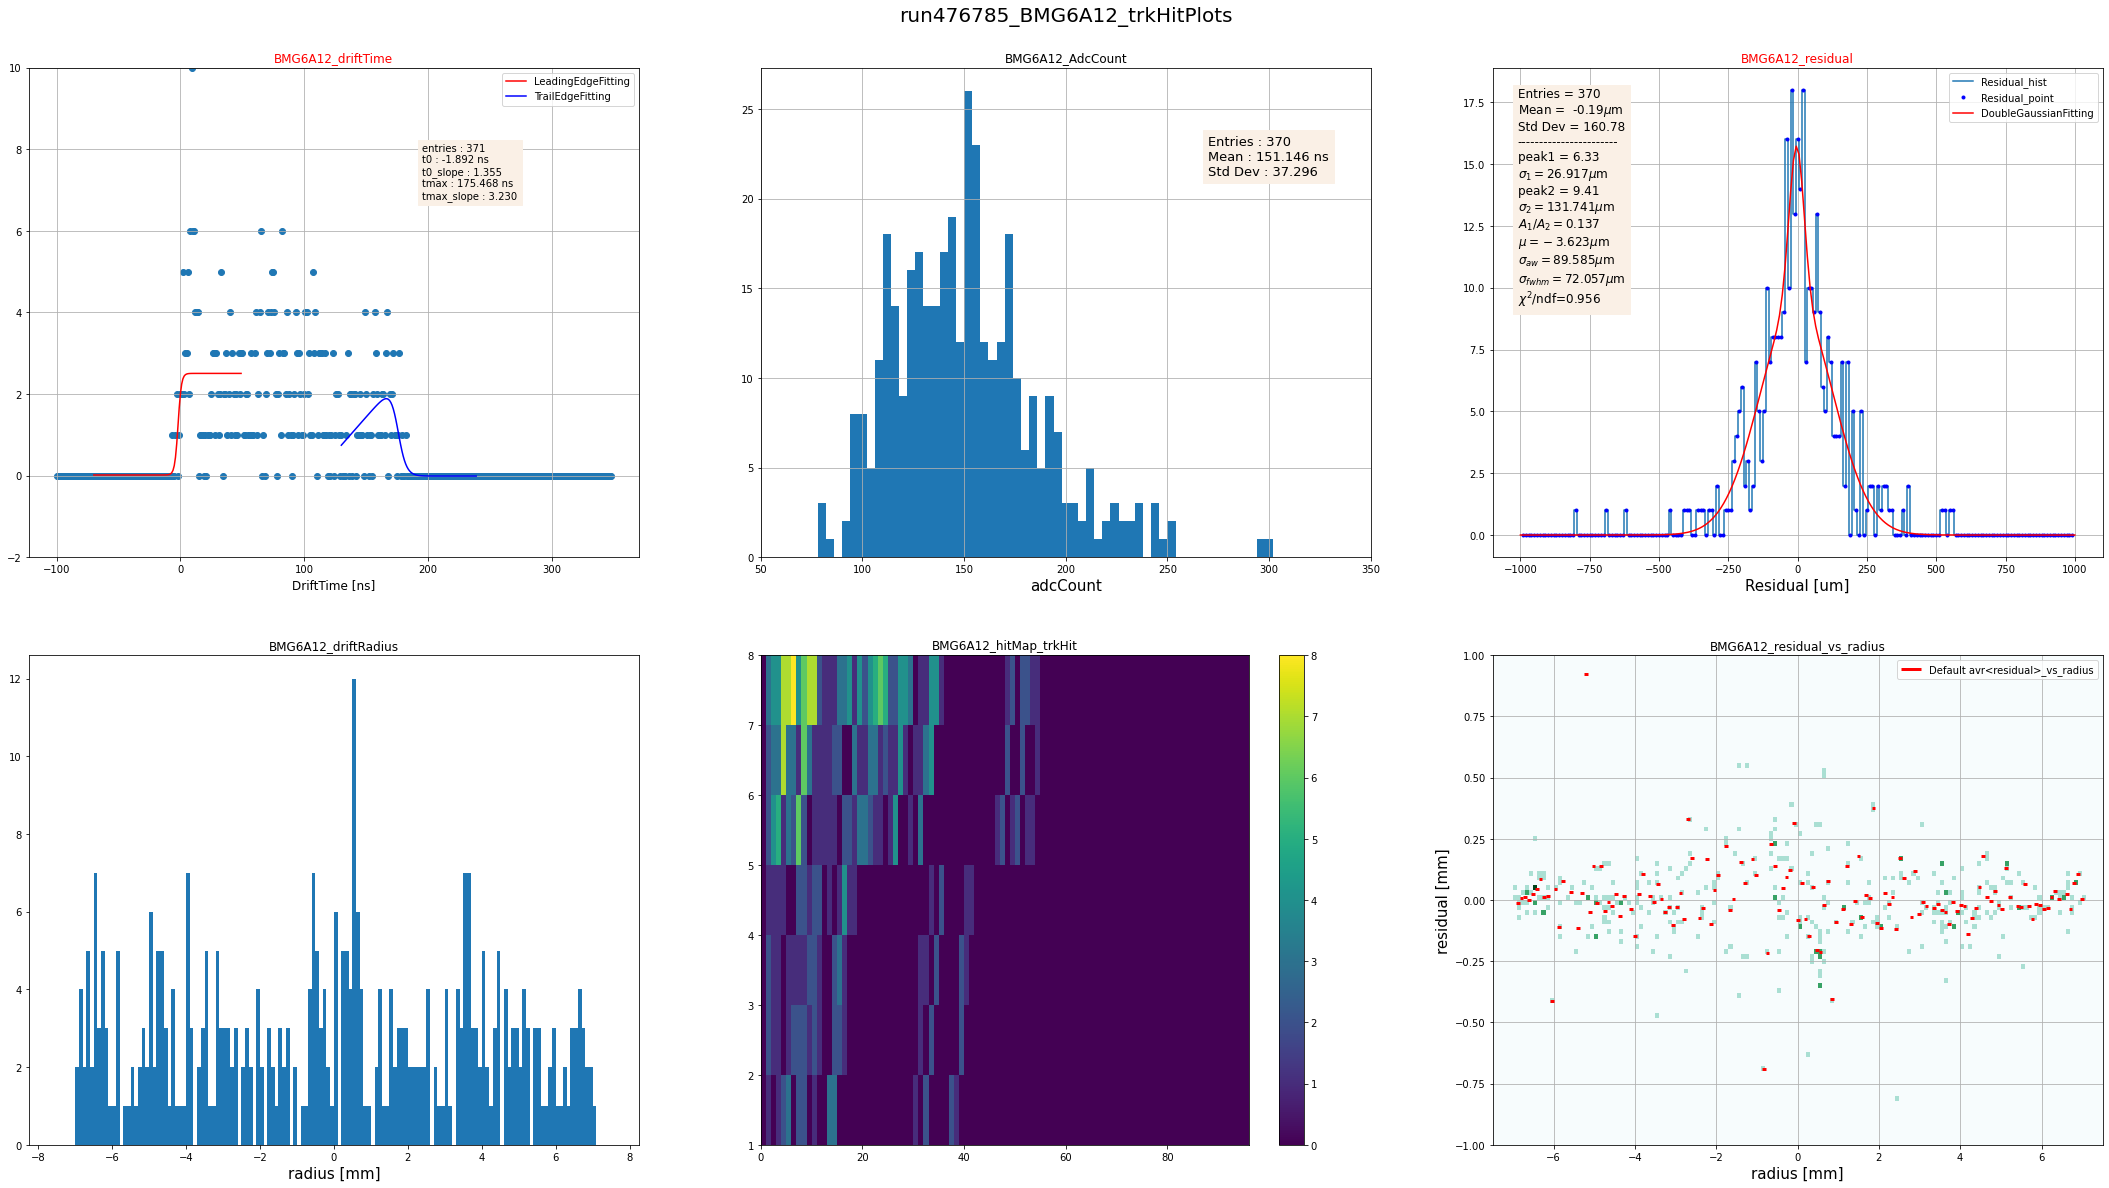

In [90]:
flag,df_trk_hits = convertMuonFixedId(df_trk_hits)
if flag :
    #plot the hitmap for the chamber in region
    for chamberName in chamberInRegion:
        plotHitMap(df_trk_hits,chamberName,'trkHit')
        plotTrkMdtHits(df_trk_hits,chamberName)

In [83]:
df_raw.columns

Index(['rawMdt_adc', 'rawMdt_gPosX', 'rawMdt_gPosY', 'rawMdt_gPosZ',
       'rawMdt_id', 'rawMdt_nRMdt', 'rawMdt_tdc'],
      dtype='object')

In [85]:
# common function to expand the MuonFixedId to tubeInfo
def convertMuonFixedId(df):
    # check if there has a column named xxx_id
    for col in df.columns:
        colName,variableName = col.split('_',1)
        if variableName != 'id' : continue
        else :
            # expand all track hits with correct chamberName and tubeInfo
            df[f'{colName}_tubeInfo'] = df[f'{colName}_id'].apply(lambda x : chamberlist_run3.MDTtubename(int(x)))
            df[f'{colName}_station'] = df[f'{colName}_tubeInfo'].apply(lambda x :x[:7])
            df[f'{colName}_stationType'] = df[f'{colName}_tubeInfo'].apply(lambda x :x[:3])
            return True,df
    return False,df

In [165]:
%%time
# # expand all track hits with correct chamberName and tubeInfo
df_trk_hits['trkHit_tubeInfo'] = df_trk_hits['trkHit_id'].apply(lambda x : chamberlist_run3.MDTtubename(int(x)))
df_trk_hits['trkHit_chamber'] = df_trk_hits['trkHit_tubeInfo'].apply(lambda x :x[:7])
df_trk_hits['trkHit_station'] = df_trk_hits['trkHit_tubeInfo'].apply(lambda x :x[:3])

CPU times: user 10.8 s, sys: 53 ms, total: 10.8 s
Wall time: 11.7 s


In [168]:
df_trk_hits[df_trk_hits['trkHit_chamber']=="BIS7A02"].shape[0]

7837

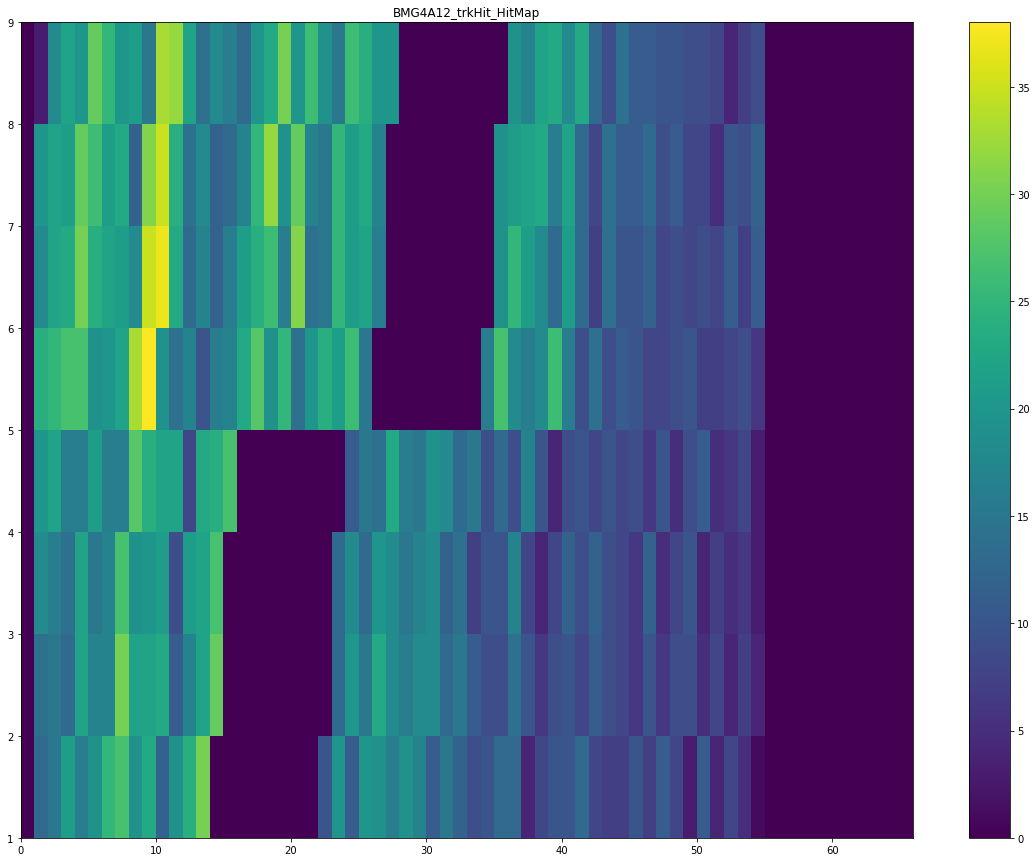

In [51]:
# plotting function for channel hitMap 
def plotHitMap(df_all,chamber,typeName):
    
    pd_mdt_chamber = df_all[df_all[f'{typeName}_station']==chamber]

    chamberinfo = list(pd_mdt_chamber[f'{typeName}_tubeInfo'])
    #apply to ML-Layer-Tube columns
    ml =[int(x.split('-')[1]) for x in chamberinfo]
    ly =[int(x.split('-')[2]) for x in chamberinfo]
    nLayer = [(int(x.split('-')[1])-1)*4 + int(x.split('-')[2]) for x in chamberinfo]
    tb =[int(x.split('-')[3]) for x in chamberinfo]

    fig,ax = plt.subplots(figsize=(20,15))
    ax.set_title(f'{chamber}_{typeName}_HitMap')
    
    # get Maxtube per layer and total layer from chamberlist_run3.py
    maxLy = chamberlist_run3.MDTtotalLayers(chamber)
    maxTb = chamberlist_run3.MDTtotalTubes(chamber)
    
    counts, xedges, yedges, im = ax.hist2d(tb,nLayer, bins = [66,8], range= [[0,66],[1,9]], cmap=plt.cm.viridis,label='hitMap')
    fig.colorbar(im, ax=ax)
    plt.show()
    fig.savefig(f'run476785_{chamber}_{typeName}_HitMap.png')
    
plotHitMap(df_trk_hits,'BMG4A12','trkHit')

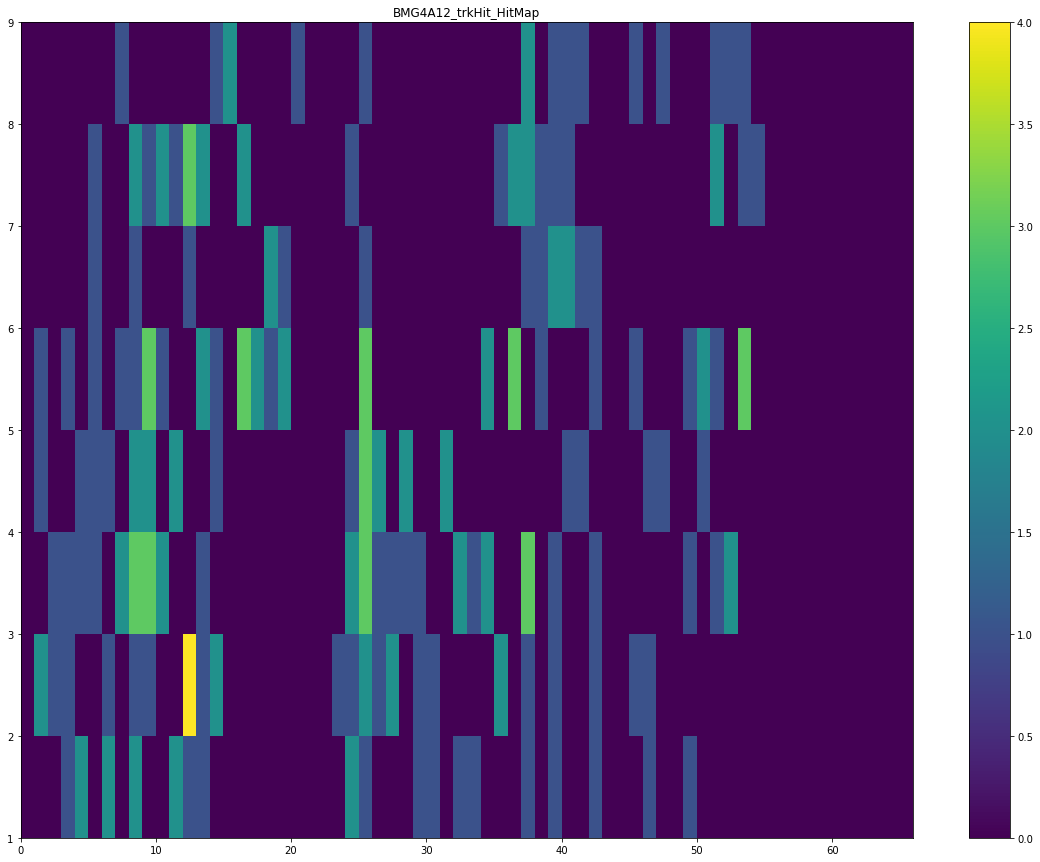

In [54]:
# # expand all track hits with correct chamberName and tubeInfo
df_trk_outliers['trkHit_tubeInfo'] = df_trk_outliers['trkHit_id'].apply(lambda x : chamberlist_run3.MDTtubename(int(x)))
df_trk_outliers['trkHit_station'] = df_trk_outliers['trkHit_tubeInfo'].apply(lambda x :x[:7])
df_trk_outliers['trkHit_type'] = df_trk_outliers['trkHit_tubeInfo'].apply(lambda x :x[:3])
plotHitMap(df_trk_outliers,'BMG4A12','trkHit')

In [154]:
df_hole_MDT.trkHole_station.value_counts()

trkHole_station
EMS1C08    26
EOS1C08    26
EOS2C08    16
EMS2C08    14
EML1C09    13
BEE2C08     8
EOS4C08     8
EOL1C07     6
EML2C07     4
EOL2C09     4
EMS3C08     4
EOL2C07     4
EML1C07     3
EOS3C08     3
EML3C07     3
EOL1C09     2
EOL3C09     2
EOS5C08     2
EML2C09     2
EOL3C07     1
EOL4C07     1
Name: count, dtype: int64

In [158]:
%%time
# # expand all track hits with correct chamberName and tubeInfo
df_hole_MDT['trkHole_tubeInfo'] = df_hole_MDT['trkHole_id'].apply(lambda x : chamberlist_run3.MDTtubename(int(x)))
df_hole_MDT['trkHole_station'] = df_hole_MDT['trkHole_tubeInfo'].apply(lambda x :x[:7])
df_hole_MDT['trkHole_type'] = df_hole_MDT['trkHole_tubeInfo'].apply(lambda x :x[:3])

CPU times: user 288 ms, sys: 3.05 ms, total: 291 ms
Wall time: 293 ms


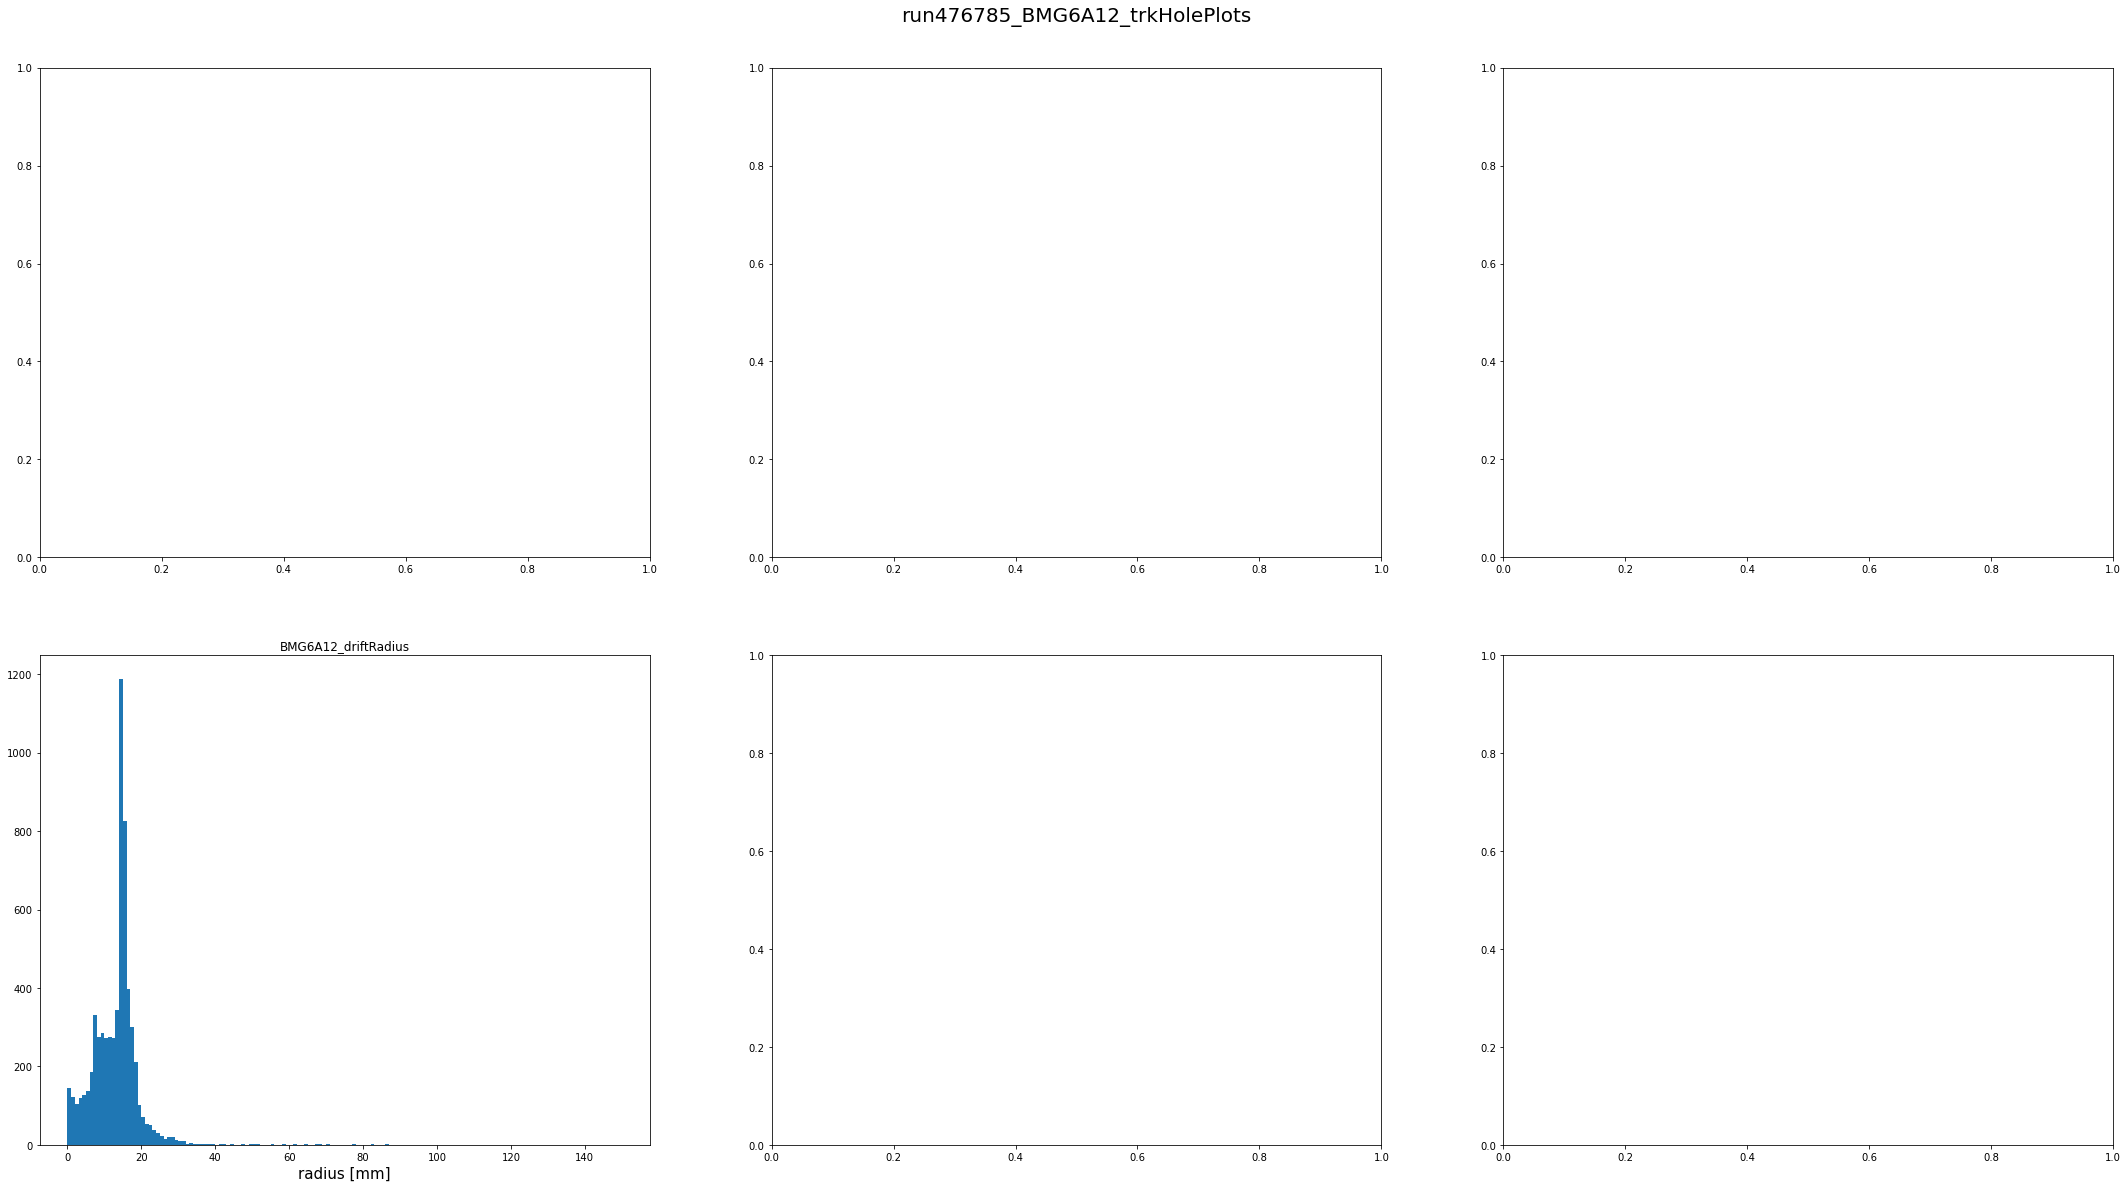

In [159]:
mdtHole_r = df_hole_MDT.trkHole_driftRadius.values.astype(float)  # only MDT holes

#    mdt_r = pd_mdt_chamber.trkHit_driftRadius.values.astype(float)
    # radius distribution
fig,axes = plt.subplots(figsize=(30, 17), nrows = 2, ncols = 3)
fig.subplots_adjust(top = 0.93, bottom = 0.05, left =0.02,right =0.98, wspace = 0.2, hspace = 0.2)
fig.suptitle('run%s_%s_trkHolePlots'%(run,chamber), fontsize=20)
axes[1,0].hist(mdtHole_r,bins=150,range=[0,150],label = 'r')
axes[1,0].set_xlabel('radius [mm]',fontsize =15)
axes[1,0].set_title(f'{chamber}_driftRadius')

plt.show()

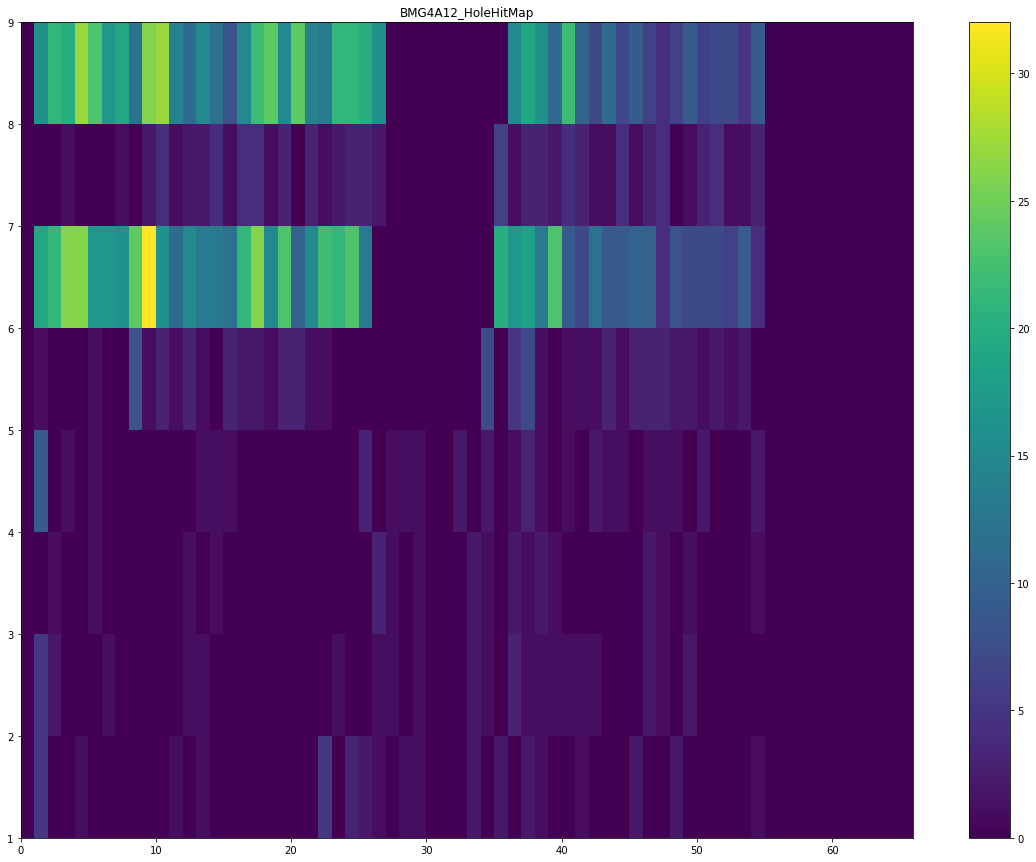

In [52]:
# plotting function for channel hitMap 
def plotHoleHitMap(df_all,chamber):
    
    pd_mdt_chamber = df_all[df_all['trkHole_station']==chamber]

    chamberinfo = list(pd_mdt_chamber.trkHole_tubeInfo)
    #apply to ML-Layer-Tube columns
    ml =[int(x.split('-')[1]) for x in chamberinfo]
    ly =[int(x.split('-')[2]) for x in chamberinfo]
    nLayer = [(int(x.split('-')[1])-1)*4 + int(x.split('-')[2]) for x in chamberinfo]
    tb =[int(x.split('-')[3]) for x in chamberinfo]

    fig,ax = plt.subplots(figsize=(20,15))
    ax.set_title(f'{chamber}_HoleHitMap')
    
    # get Maxtube per layer and total layer from chamberlist_run3.py
    maxLy = chamberlist_run3.MDTtotalLayers(chamber)
    maxTb = chamberlist_run3.MDTtotalTubes(chamber)
    
    counts, xedges, yedges, im = ax.hist2d(tb,nLayer, bins = [66,8], range= [[0,66],[1,9]], cmap=plt.cm.viridis,label='hitMap')
    fig.colorbar(im, ax=ax)
    plt.show()
    fig.savefig(f'run476785_{chamber}_HoleHitMap.png')
    
plotHoleHitMap(df_hole_MDT,'BMG4A12')

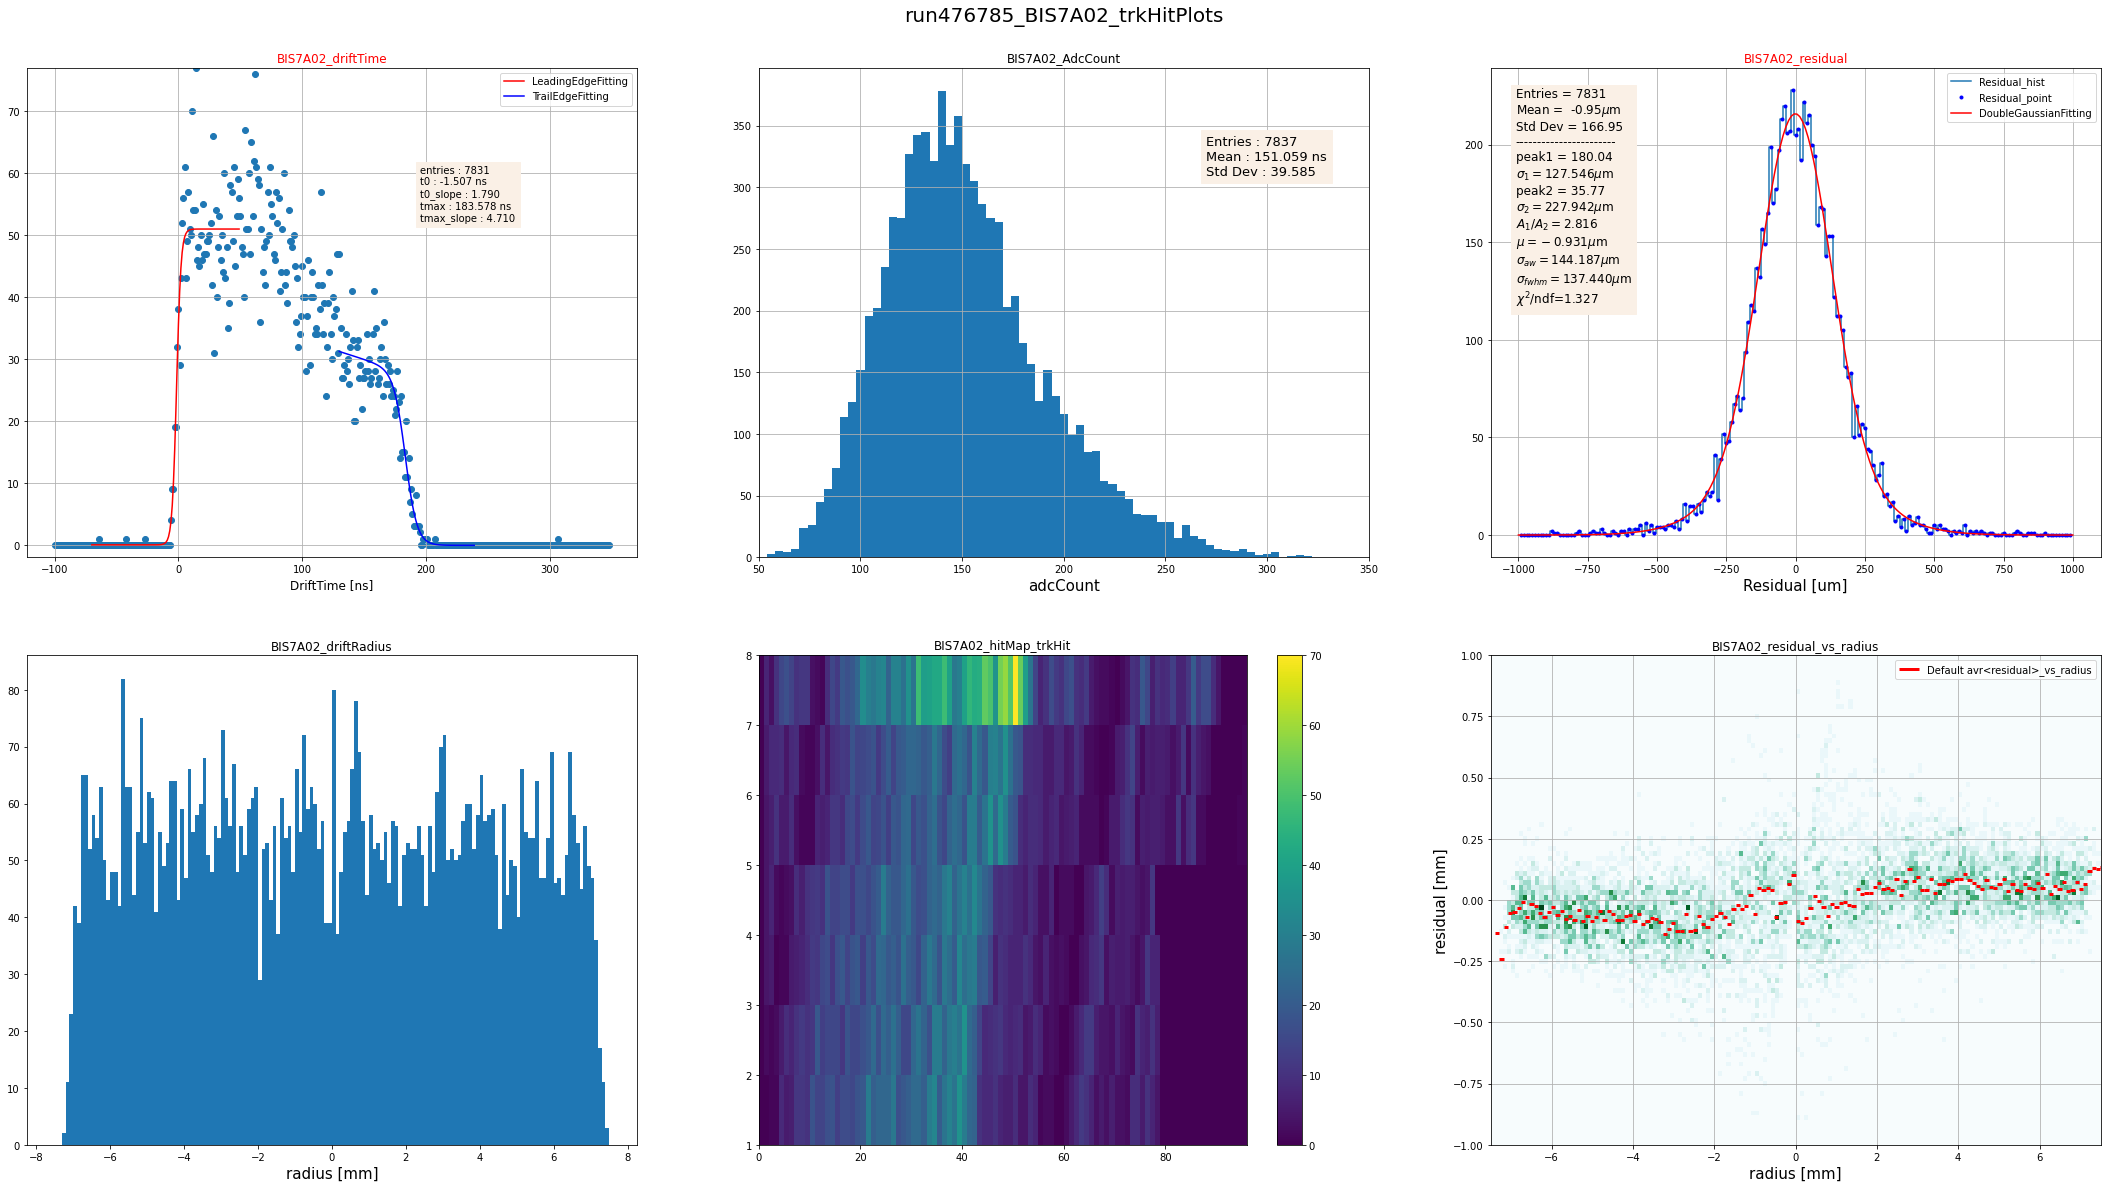

In [171]:
from scipy import stats
# track hits overall
# make chamber overall info
run = '476785'

def plotTrkMdtHits(df_all,chamber):

    fig,axes = plt.subplots(figsize=(30, 17), nrows = 2, ncols = 3)
    fig.subplots_adjust(top = 0.93, bottom = 0.05, left =0.02,right =0.98, wspace = 0.2, hspace = 0.2)
    fig.suptitle('run%s_%s_trkHitPlots'%(run,chamber), fontsize=20)
    
    pd_mdt_chamber = df_all[df_all['trkHit_chamber']==chamber]
    maxRadius, maxDriftTime = 15.0, 800.0
    #splitBin = 13  # sMDT = 25  MDT = 13
    if (chamber[:3] in ['BME','BMG']) or chamber[:5] == 'BIS7A':
        maxRadius, maxDriftTime = 7.5, 200.0

    # driftTime spectrum
    t0_fit,tmax_fit, axes[0,0] = mdtCalib_functions.fitT0Tmax(pd_mdt_chamber['trkHit_driftTime'],chamber,axes[0,0])
    axes[0,0].set_title(f'{chamber}_driftTime')
    
    # hitmap
    chamberinfo = list(pd_mdt_chamber.trkHit_tubeInfo)
    #apply to ML-Layer-Tube columns
    ml =[int(x.split('-')[1]) for x in chamberinfo]
    ly =[int(x.split('-')[2]) for x in chamberinfo]
    nLayer = [(int(x.split('-')[1])-1)*4 + int(x.split('-')[2]) for x in chamberinfo]
    tb =[int(x.split('-')[3]) for x in chamberinfo]
    axes[1,1].set_title(f'{chamber}_hitMap_trkHit')
    
    counts, xedges, yedges, im = axes[1,1].hist2d(tb,nLayer, bins = [96,7], range= [[0,96],[1,8]], cmap=plt.cm.viridis,label='hitMap')
    fig.colorbar(im, ax=axes[1,1])
    

    # residual 
    mdt_resi = pd_mdt_chamber.trkHit_resi.values.astype(float)
    x1,bins1 = np.histogram(mdt_resi*1000,bins = np.arange(-1000,1000,10))
    mdtCalib_functions.fitResidual(x1,bins1,'Residual',axes[0,2])
    axes[0,2].set_title(f'{chamber}_residual')
    

    mdt_r = pd_mdt_chamber.trkHit_driftRadius.values.astype(float)
    # radius distribution
    axes[1,0].hist(mdt_r,bins=150,range=[-7.5,7.5],label = 'r')
    axes[1,0].set_xlabel('radius [mm]',fontsize =15)
    axes[1,0].set_title(f'{chamber}_driftRadius')
    

    # ADC count
    mdt_adc = pd_mdt_chamber.trkHit_adc.values.astype(float)
    xadc, xbins, patch = axes[0,1].hist(mdt_adc,bins=75,range=[50,350],label = 'adc')
    mean = np.average(mdt_adc)
    std = np.sqrt(np.average((mdt_adc - mean)**2))
    axes[0,1].set_xlim(50,350)
    axes[0,1].set_xlabel('adcCount',fontsize=15)
    axes[0,1].text(270,np.max(xadc)*0.82,'Entries : %d\nMean : %.3f ns\nStd Dev : %.3f'%(np.sum(xadc),mean,std),backgroundcolor='linen',fontsize =13)
    axes[0,1].grid()
    axes[0,1].set_title(f'{chamber}_AdcCount')
    

    # Residual vs Radius
    import matplotlib.colors as mpl
    counts, xedges, yedges, im2 = axes[1,2].hist2d(mdt_r, mdt_resi, bins=[150,100],range = [[-1*maxRadius,1*maxRadius],[-1,1]],cmap=plt.cm.BuGn,label='residual_vs_radius')
    #cmap.set_bad('white',1.)
    axes[1,2].set_ylim(-1,1)
    axes[1,2].set_xlim(-7.5,7.5)
    axes[1,2].set_xlabel('radius [mm]',fontsize=15)
    axes[1,2].set_ylabel('residual [mm]',fontsize=15)
    #plt.colorbar(im2, ax=axes[1,1])
    bin_means, bin_edges, binnumber = stats.binned_statistic(mdt_r, mdt_resi, statistic='median', bins=150)

    axes[1,2].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=3,label='Default avr<residual>_vs_radius')
    axes[1,2].legend()
    axes[1,2].grid()
    axes[1,2].set_title(f'{chamber}_residual_vs_radius')

    fig.patch.set_facecolor('white')
    plt.savefig('run%s_%s_trkHitPlots.png'%(run,chamber))
    plt.show()

chamberName = 'BIS7A02'
plotTrkMdtHits(df_trk_hits,chamberName)


In [ ]:
# RT plot + timeslewing (residual vs 1/ADC)